<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

In [1]:
###Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable target).

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import  metrics
from sklearn.model_selection import StratifiedKFold

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####Load Data

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-full.csv',sep=';')

In [4]:
dataset.sample(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6854,57,retired,married,tertiary,no,0,yes,yes,unknown,28,may,648,1,-1,0,unknown,yes
13238,59,management,married,tertiary,no,96,no,yes,cellular,8,jul,55,1,-1,0,unknown,no
2280,31,admin.,married,secondary,no,-474,yes,no,unknown,12,may,215,2,-1,0,unknown,no
24482,48,services,divorced,secondary,no,361,no,no,cellular,17,nov,287,1,-1,0,unknown,no
35102,20,student,single,secondary,no,602,yes,no,cellular,6,may,373,4,-1,0,unknown,no
20266,34,technician,married,tertiary,no,0,no,no,cellular,11,aug,68,4,-1,0,unknown,no
3423,45,management,single,tertiary,no,0,yes,no,unknown,15,may,197,4,-1,0,unknown,no
32730,29,management,married,tertiary,no,760,no,yes,cellular,17,apr,82,2,-1,0,unknown,no
34674,48,technician,single,tertiary,no,104,yes,no,cellular,5,may,124,2,344,1,other,no
17513,57,services,married,primary,no,1700,yes,no,cellular,29,jul,178,12,-1,0,unknown,no


In [5]:
dataset['y'].replace({'yes':1,'no':0},inplace=True)


In [6]:
dataset.rename({'y':'target'},axis=1, inplace=True)

In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#Exploratory data analysis

##Checking data type of variables

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


##Checking if there are any missing values

In [9]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

##Checking descriptive statistics

In [41]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


##Unique values per column

In [42]:
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job --> 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> 3
['married' 'single' 'divorced']

education --> 4
['tertiary' 'secondary' 'unknown' 'primary']

default --> 2
['no' 'yes']

balance --> 7168
[ 2143    29     2 ...  8205 14204 16353]

housing --> 2
['yes' 'no']

loan --> 2
['no' 'yes']

contact --> 3
['unknown' 'cellular' 'telephone']

day --> 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month --> 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration --> 1573
[ 261  151   76 ... 1298 1246 1556]

campaign --> 48
[ 1  2  3  5  4  6  7  

##Checking correlation between variables

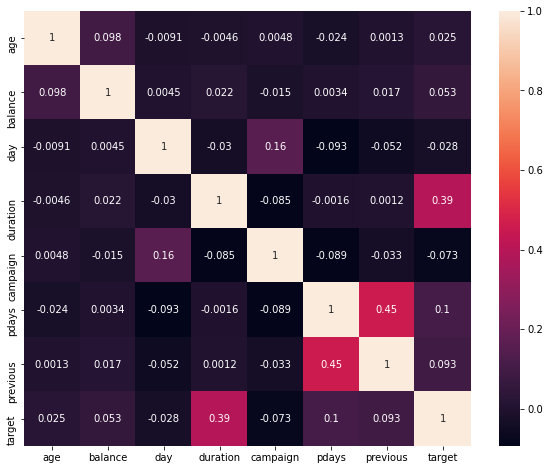

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True);

##Checking ratio target variable

Target variable

In [33]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.883015
1    0.116985
Name: target, dtype: float64

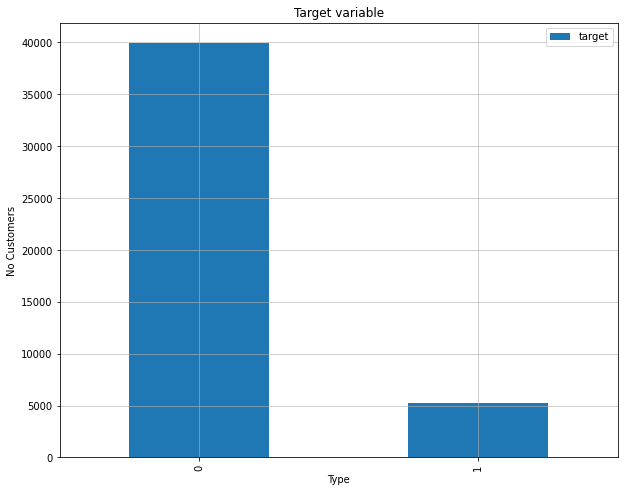

In [32]:
plt.figure(figsize=(10,8))
dataset['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.ylabel('No Customers')
plt.xlabel('Type')
plt.legend()
plt.grid(axis='both', alpha=0.75);

##Checking variables 

 Variables

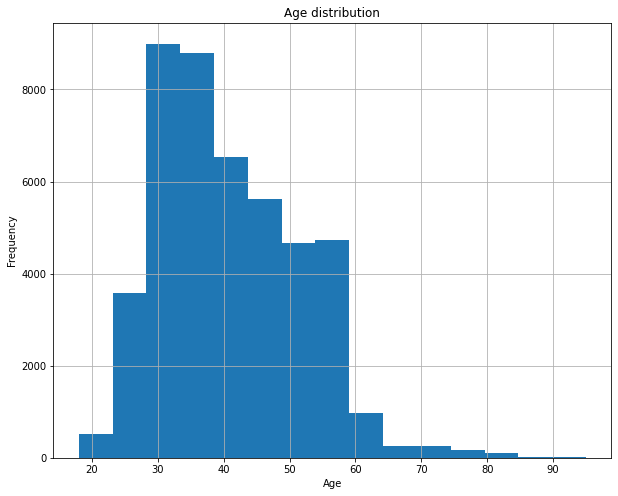

In [15]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution');

###Plotting variables to check thier distribiution

In [16]:
def plot_variables(var):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,data=dataset,order=order)
  plt.title(f'{var} distribution'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

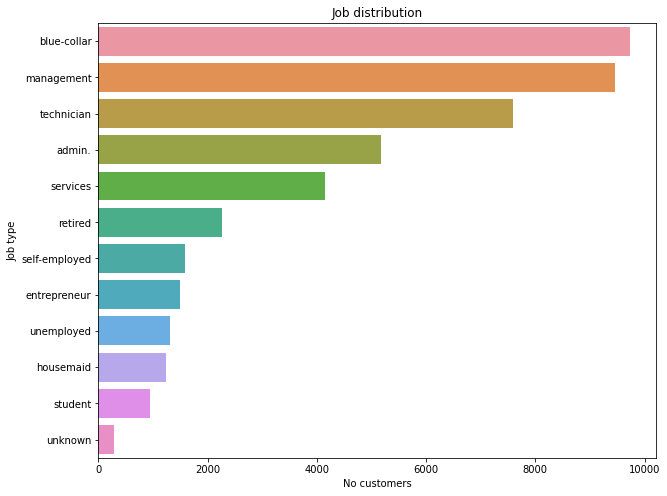

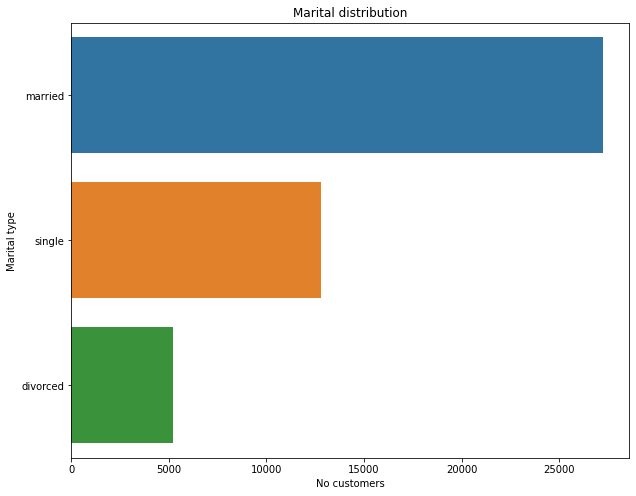

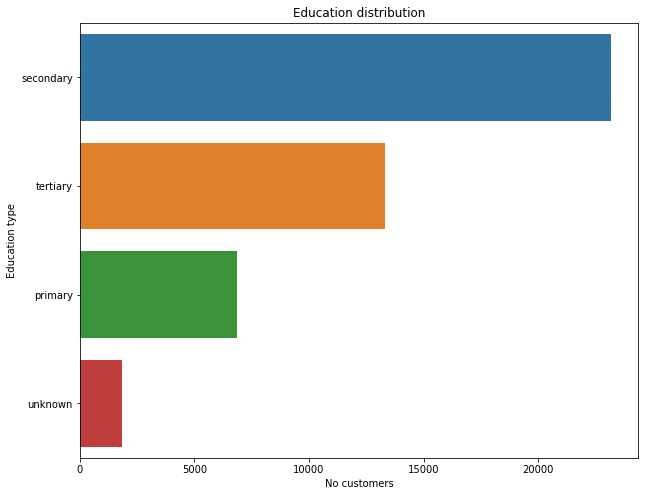

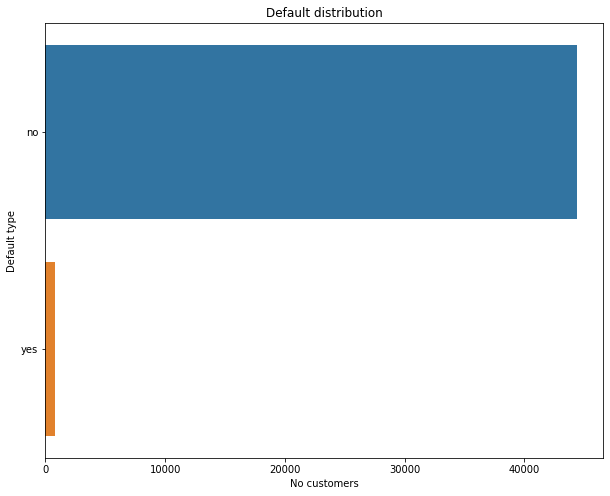

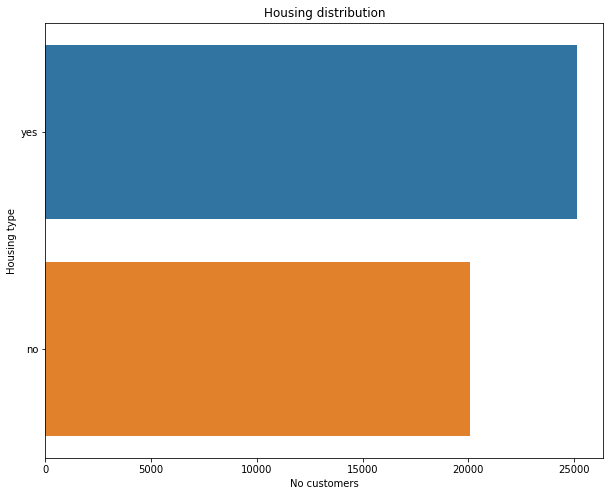

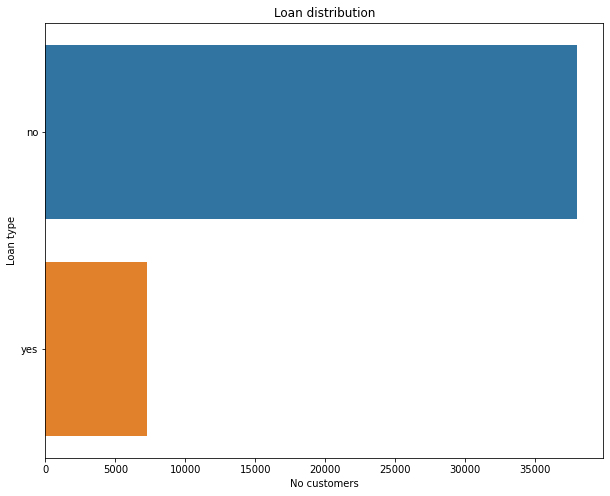

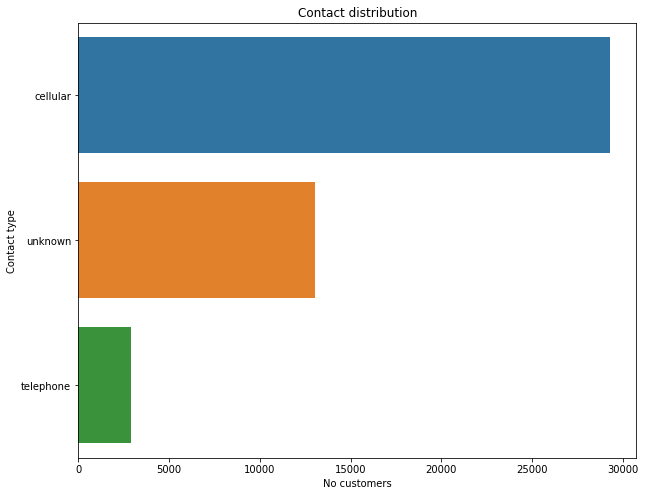

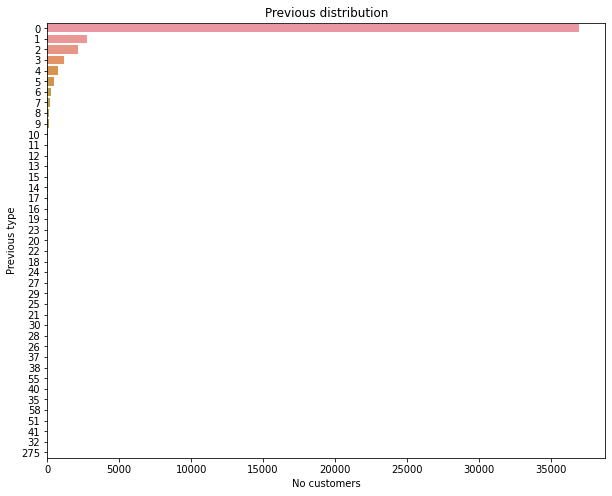

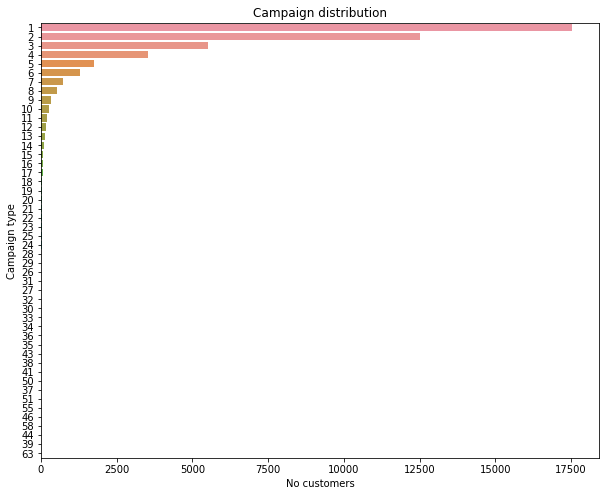

In [40]:
dataset.columns
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variables(var) for var in vars];

###Plotting variables by target

In [18]:
def plot_variablesByTarget(var,target):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,hue=target,data=dataset,order=order)
  plt.title(f'{var} distribution divided by target variable'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

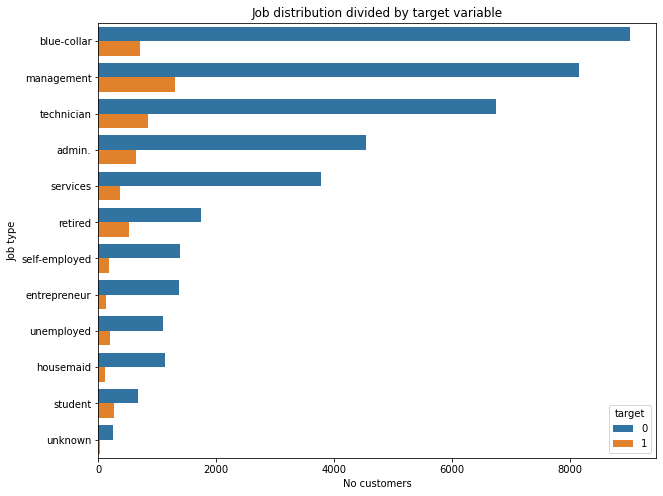

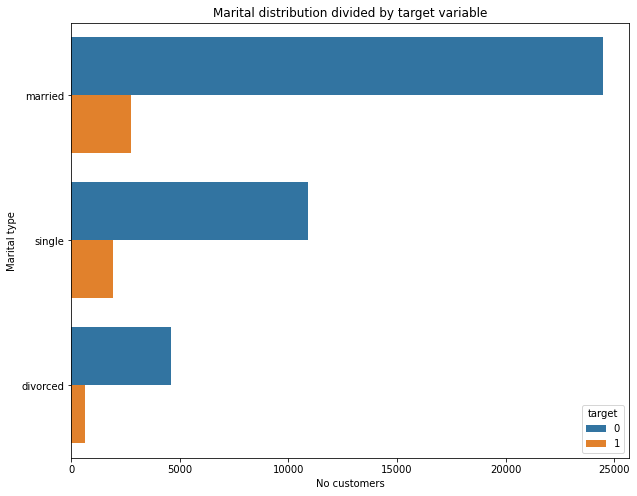

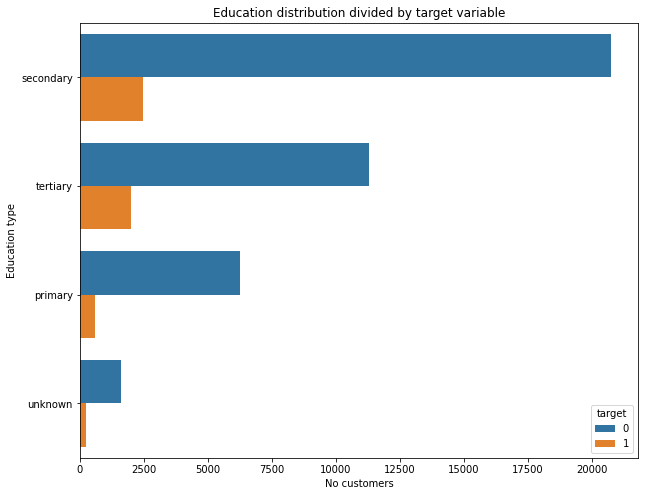

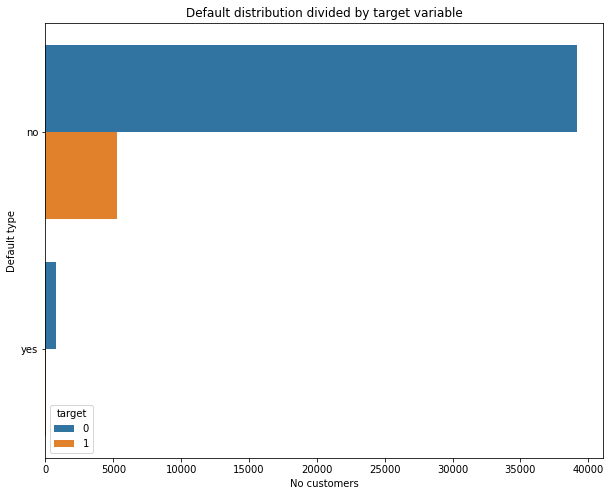

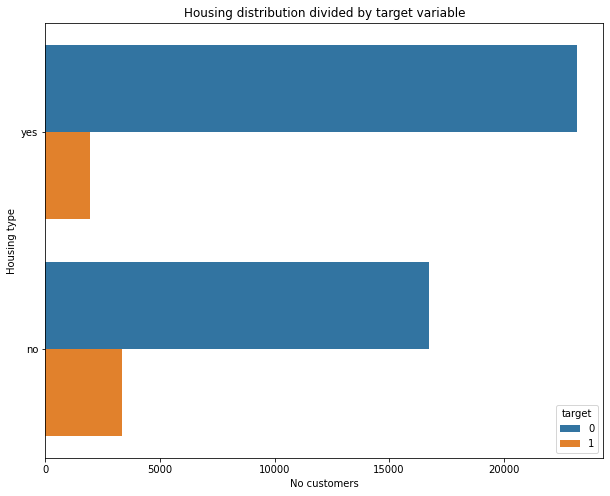

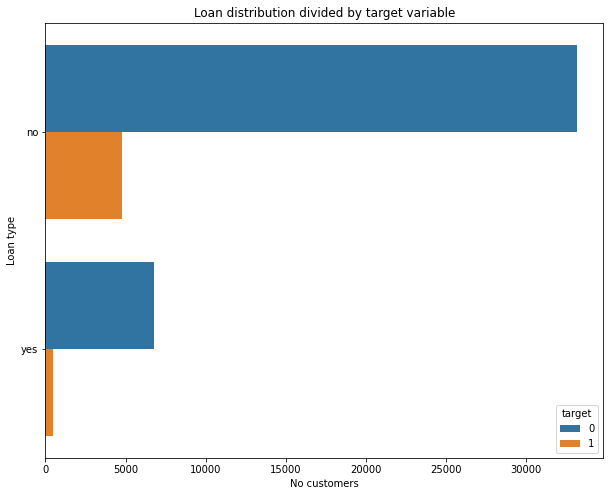

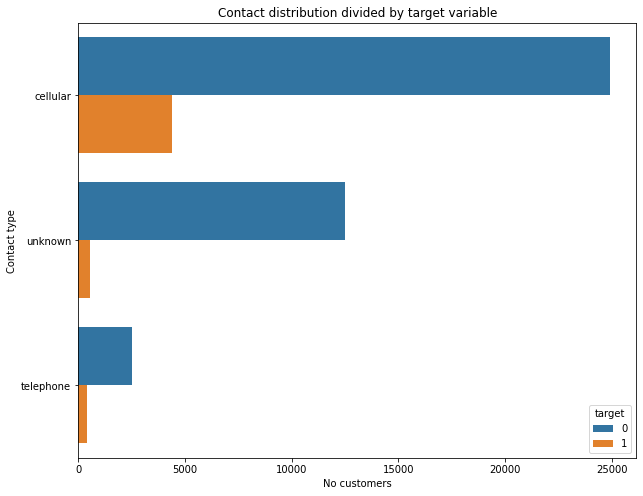

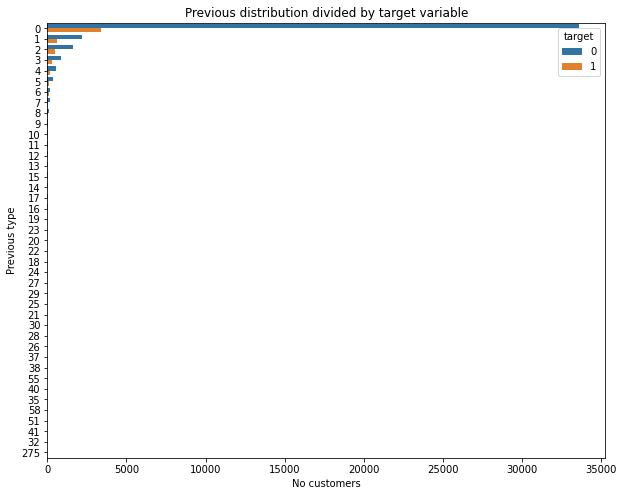

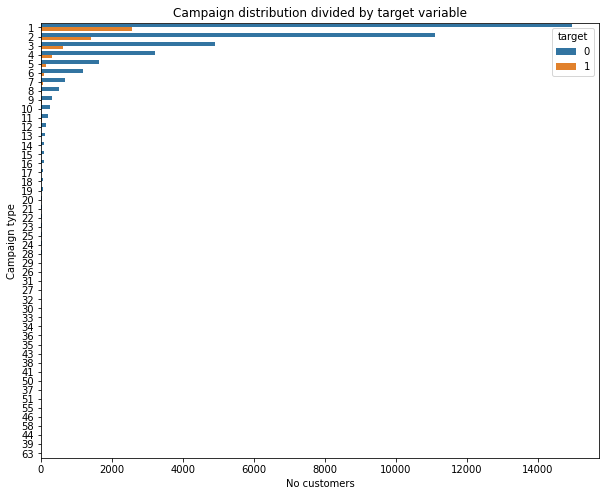

In [39]:
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variablesByTarget(var,'target') for var in vars];

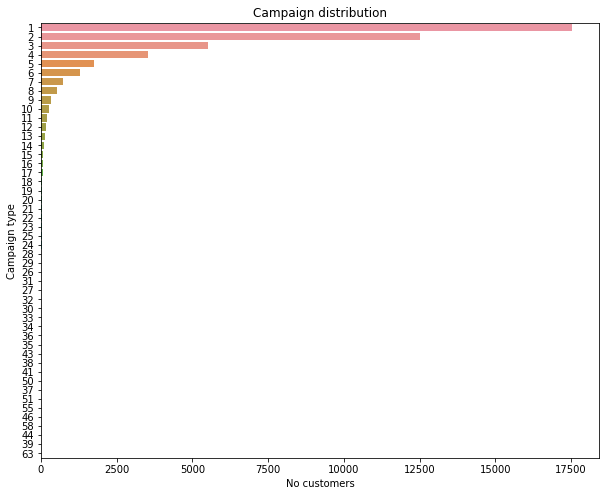

In [38]:
plot_variables('campaign')

(None, None, None, None, None)

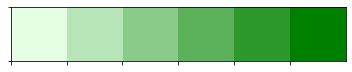

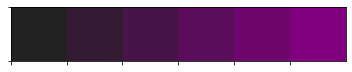

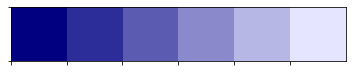

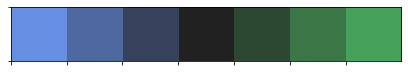

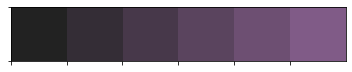

In [20]:
sns.palplot(sns.light_palette("green")),sns.palplot(sns.dark_palette("purple")),sns.palplot(sns.light_palette("navy", reverse=True)),sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark")),sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

In [22]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [24]:
### Distributions

numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'target'],
      dtype='object')

In [25]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Column name: age
Unique values: 77


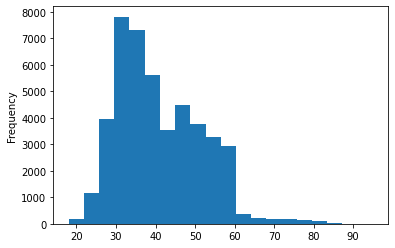

Column name: balance
Unique values: 7168


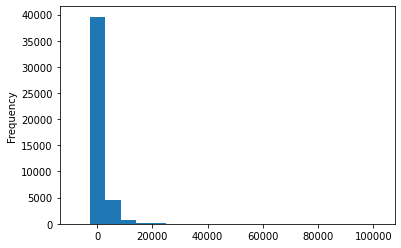

Column name: day
Unique values: 31


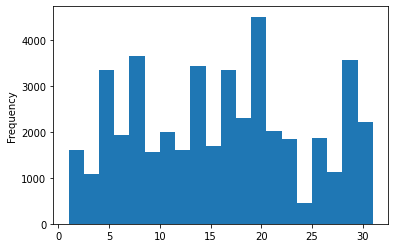

Column name: duration
Unique values: 1573


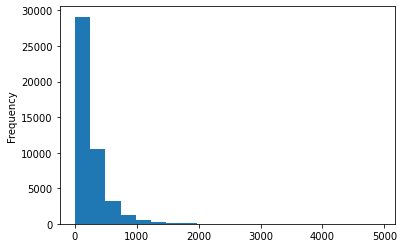

Column name: campaign
Unique values: 48


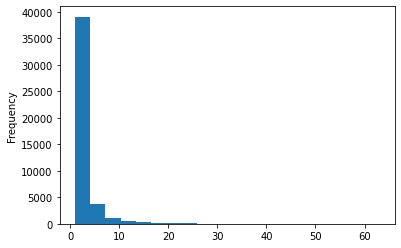

Column name: pdays
Unique values: 559


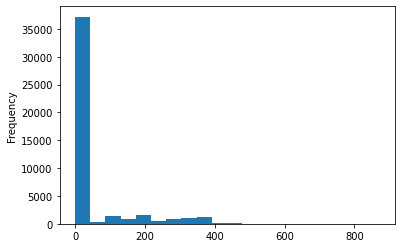

Column name: previous
Unique values: 41


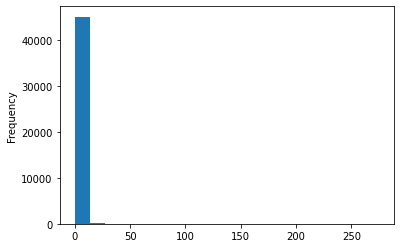

Column name: target
Unique values: 2


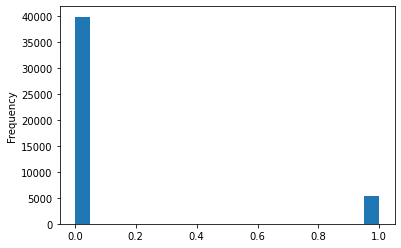

In [26]:
### Numeric columns

for column in numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values: {len(dataset[column].unique())}')
  dataset[column].plot.hist(bins=20)
  plt.show()

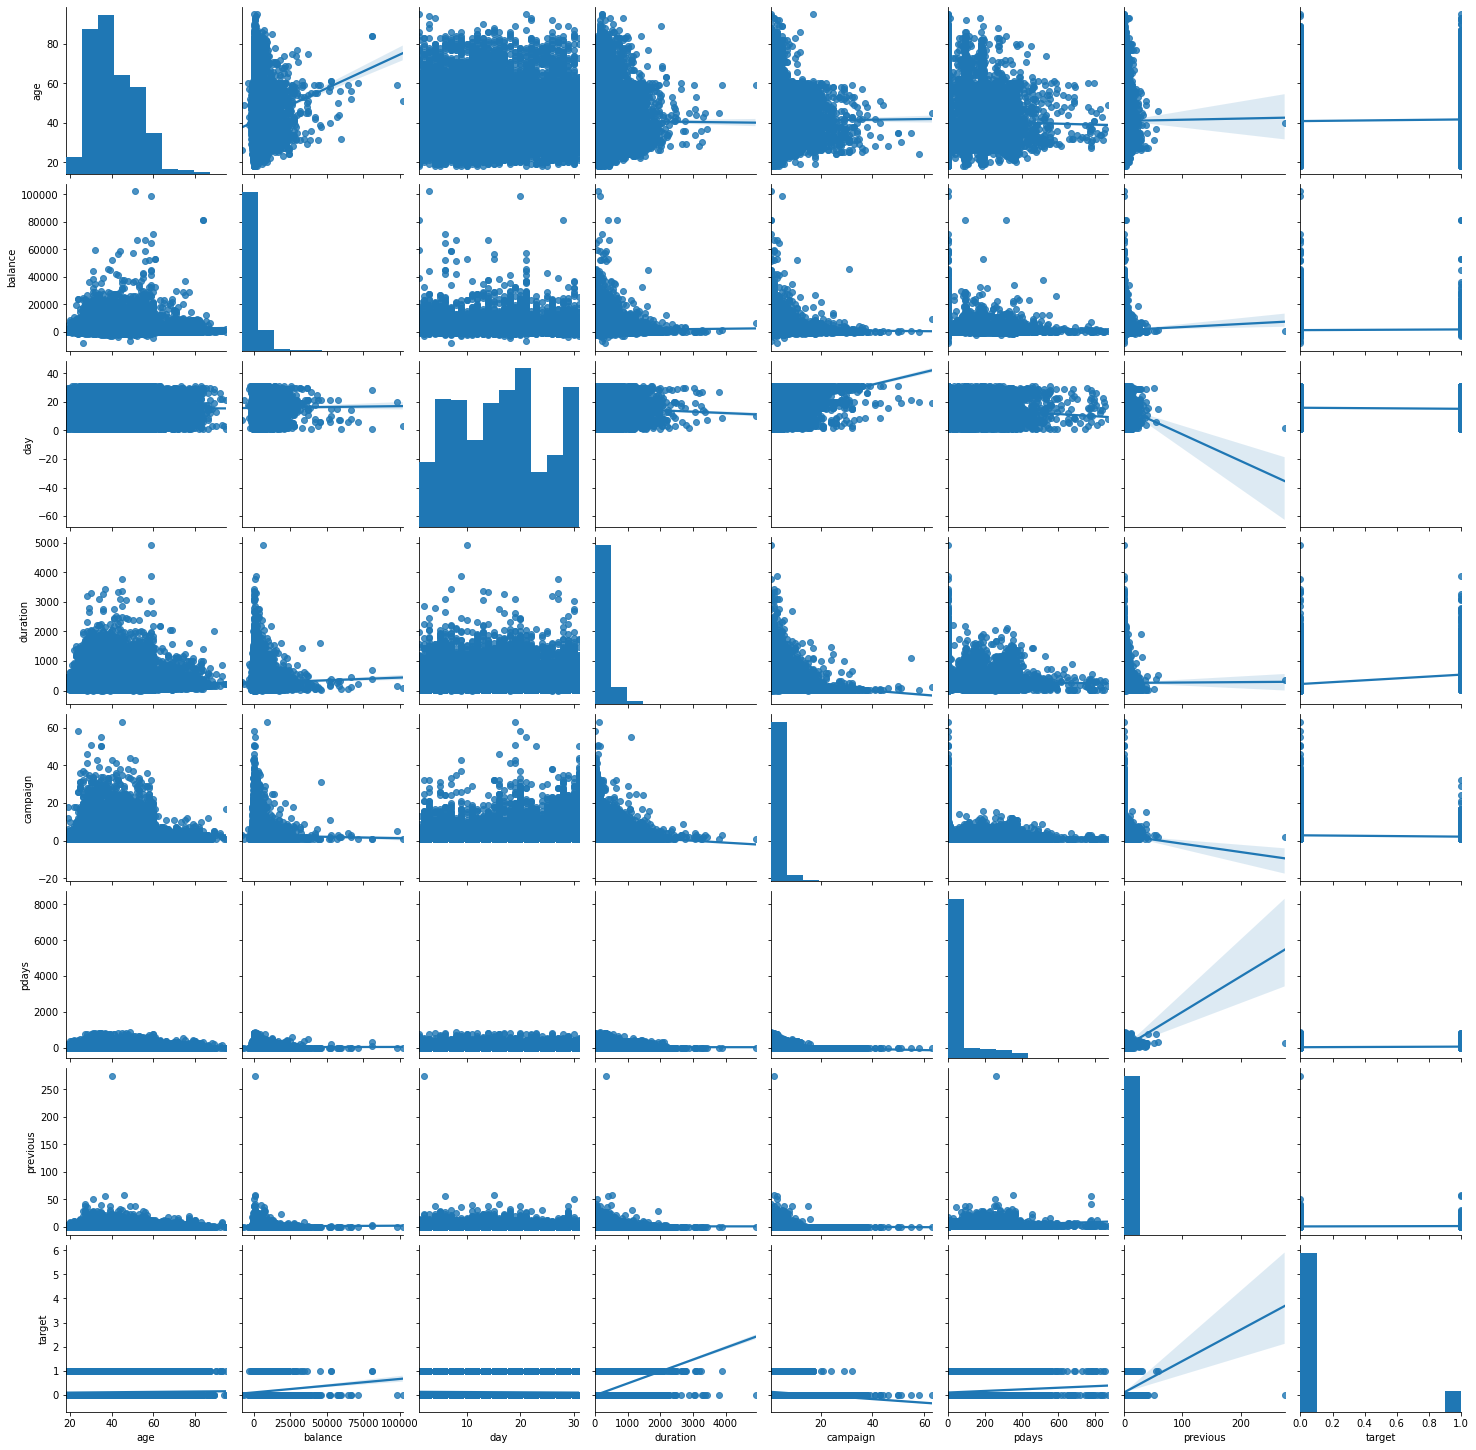

In [27]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Column name: job
Unique values:12


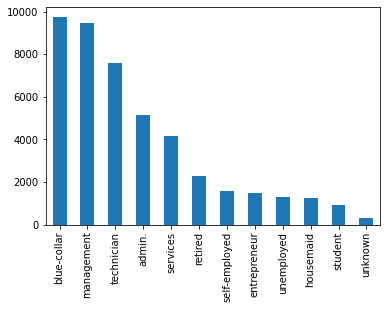

Column name: marital
Unique values:3


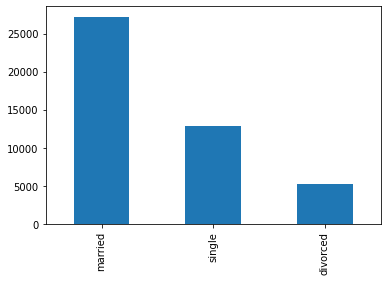

Column name: education
Unique values:4


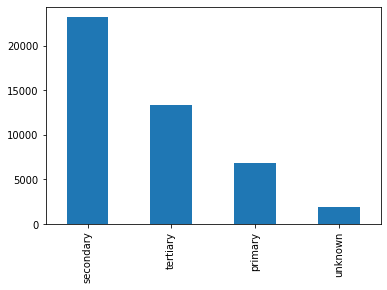

Column name: default
Unique values:2


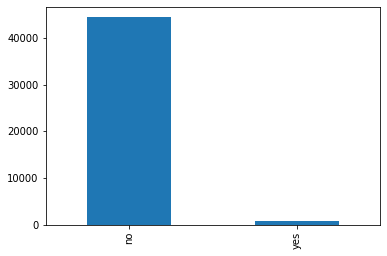

Column name: housing
Unique values:2


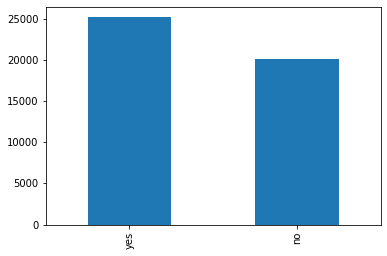

Column name: loan
Unique values:2


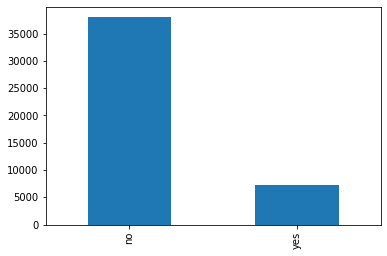

Column name: contact
Unique values:3


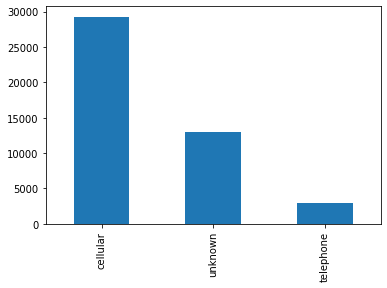

Column name: month
Unique values:12


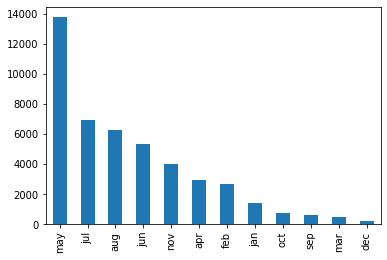

Column name: poutcome
Unique values:4


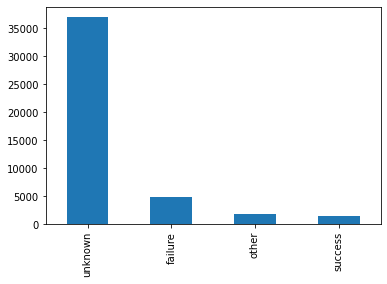

In [28]:
### Categorical columns

for column in non_numeric_columns:
  print(f'Column name: {column}')
  print(f'Unique values:{len(dataset[column].unique())}')
  dataset[column].value_counts().plot.bar()
  plt.show()

#Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding
* columns that should be removed: pdays, previous, duration, day, month

In [29]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#Data Preperation

In [43]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [31]:
for column in non_numeric_columns:
  print(column)
  print(dataset[column].value_counts())
  print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failure

#### Converting categorical attributes into numbers

In [ ]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [ ]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [ ]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

#### Drop not used columns

In [ ]:
dataset.drop([ 'pdays','previous','poutcome'  ],axis=1,inplace=True)

In [ ]:
dataset = pd.get_dummies(data=dataset,prefix_sep='_',drop_first=True)

In [ ]:
dataset.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'target', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

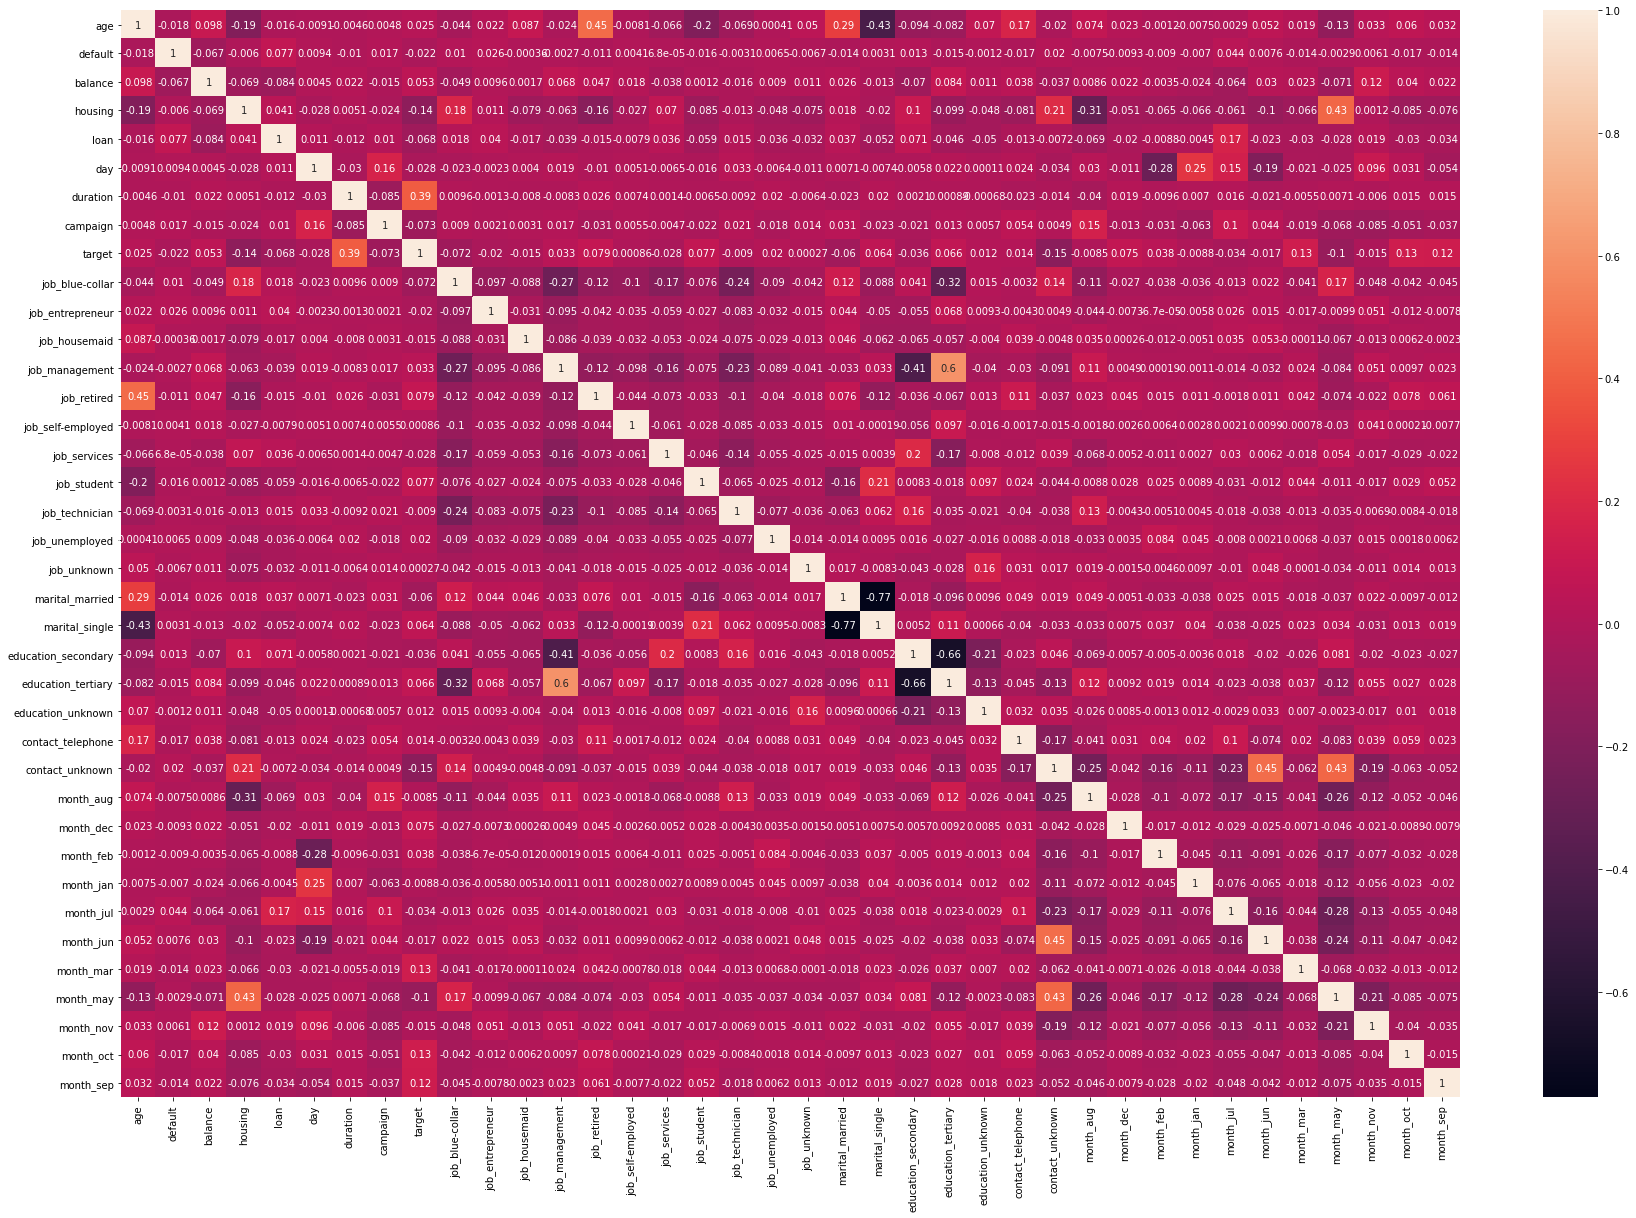

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=corr,annot=True)

In [ ]:
corr['target'].sort_values(ascending=False)

target                 1.000000
duration               0.394521
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
day                   -0.028348
month_jul             -0.034382
education_secondary   -0.036388
marital_

In [ ]:
dataset.sample(10)

,age,default,balance,housing,loan,day,duration,campaign,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
27603,48,0,761,0,0,21,307,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
25462,55,0,4053,0,0,19,113,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23251,41,0,128,1,0,27,100,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
43279,33,0,1676,1,0,12,102,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
25898,46,0,1410,1,0,19,93,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6348,35,0,-267,1,0,27,193,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6703,46,0,-363,1,1,28,236,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
20201,46,0,942,0,0,11,53,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
27651,37,0,2173,0,0,21,158,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8559,23,0,425,1,0,3,768,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


#Modeling

In [ ]:
dataset.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'target', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [ ]:
target_column = 'target'

features = dataset.columns[np.where(dataset.columns!=target_column)]

features

X = dataset[features].values

y = dataset[target_column].values



((45211, 37), (45211,))

In [ ]:
X.shape,y.shape

((45211, 37), (45211,))

In [ ]:
###Scaling data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

 
X = X_scaled

X

array([[ 1.60696496, -0.13548989,  0.25641925, ..., -0.31026348,
        -0.12881901, -0.113898  ],
       [ 0.28852927, -0.13548989, -0.43789469, ..., -0.31026348,
        -0.12881901, -0.113898  ],
       [-0.74738448, -0.13548989, -0.44676247, ..., -0.31026348,
        -0.12881901, -0.113898  ],
       ...,
       [ 2.92540065, -0.13548989,  1.42959305, ...,  3.22306705,
        -0.12881901, -0.113898  ],
       [ 1.51279098, -0.13548989, -0.22802402, ...,  3.22306705,
        -0.12881901, -0.113898  ],
       [-0.37068857, -0.13548989,  0.52836436, ...,  3.22306705,
        -0.12881901, -0.113898  ]])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(max_iter=1000)

rfe = RFE(LR,n_features_to_select=10)

rfe_fit =  rfe.fit(X,y)

In [ ]:
#No of selected features / selected features

print(f'No. selected features : {rfe_fit.n_features_}')

print(f'Selected features : {rfe_fit.support_}')

print(f'Feature Names: {np.array(features)[rfe_fit.support_]}')

No. selected features : 10
Selected features : [False False False  True  True False  True  True False False False False
 False False False False False False False False False False False False
 False  True  True False False  True  True False False  True  True False
 False]
Feature Names: ['housing' 'loan' 'duration' 'campaign' 'contact_unknown' 'month_aug'
 'month_jan' 'month_jul' 'month_may' 'month_nov']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=123,n_jobs=-1)

clf_model = clf.fit(X,y)


In [ ]:
importances = clf_model.feature_importances_

importances

array([0.11633372, 0.00194282, 0.12254952, 0.02006926, 0.01117158,
       0.10540288, 0.29734878, 0.04578744, 0.00950401, 0.00395327,
       0.00398011, 0.01163678, 0.00548206, 0.0054679 , 0.00755211,
       0.00602723, 0.01267631, 0.00565672, 0.00154632, 0.01284693,
       0.0101657 , 0.01399477, 0.01247641, 0.00617998, 0.00883382,
       0.0205675 , 0.01098897, 0.00556652, 0.00946165, 0.00654806,
       0.01042173, 0.01324201, 0.01548994, 0.0103049 , 0.0103304 ,
       0.01482545, 0.01366642])

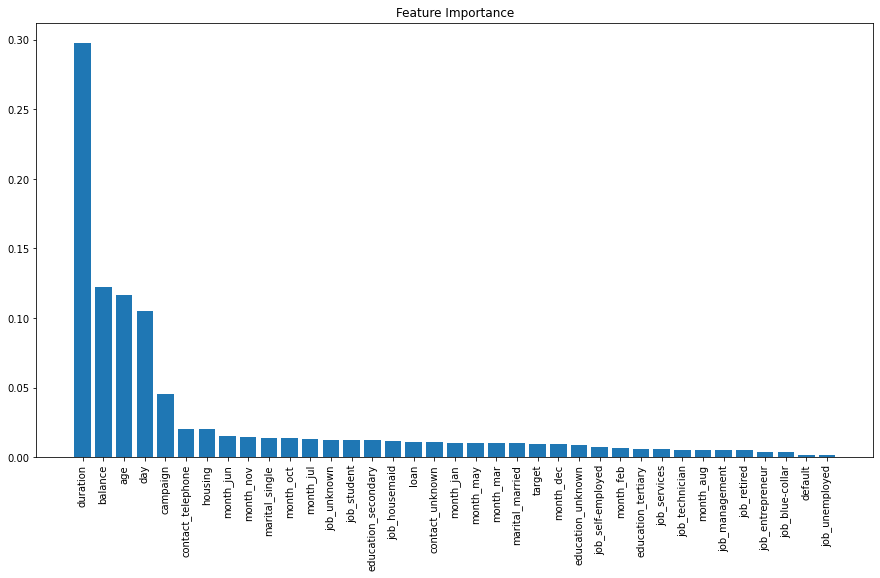

In [ ]:
indicies = np.argsort(importances)[::-1]

f_names = [dataset.columns[i] for i in indicies]

plt.figure(figsize=(15,8))

plt.title('Feature Importance')

plt.bar(range(X.shape[1]), importances[indicies])

plt.xticks(range(X.shape[1]), f_names, rotation=90)

plt.show()

In [ ]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.883015
1    0.116985
Name: target, dtype: float64

In [ ]:
### Var selected
#features = ['duration','balance','age','day','campaign','contact_telephone','housing']

features = ['housing' ,'loan' ,'duration' ,'campaign', 'contact_unknown' ,'month_aug','month_jan' ,'month_jul' ,'month_may' ,'month_nov']

X = dataset[features]

X = np.array(X)

y = np.array(dataset['target'])


In [ ]:
### Scaling
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

 
X = X_scaled

X

array([[ 0.89391541, -0.43680347,  0.0110161 , ..., -0.42420624,
         1.5113739 , -0.31026348],
       [ 0.89391541, -0.43680347, -0.41612696, ..., -0.42420624,
         1.5113739 , -0.31026348],
       [ 0.89391541,  2.2893591 , -0.70736086, ..., -0.42420624,
         1.5113739 , -0.31026348],
       ...,
       [-1.11867408, -0.43680347,  3.37379688, ..., -0.42420624,
        -0.66164964,  3.22306705],
       [-1.11867408, -0.43680347,  0.97014641, ..., -0.42420624,
        -0.66164964,  3.22306705],
       [-1.11867408, -0.43680347,  0.39932797, ..., -0.42420624,
        -0.66164964,  3.22306705]])

In [ ]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31647, 10) (31647,)
Test set: (13564, 10) (13564,)


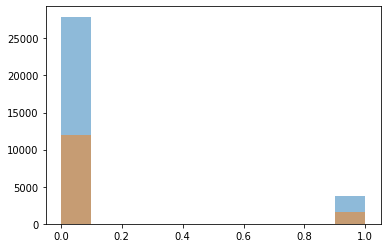

In [ ]:
plt.hist(y_train, alpha=0.5)
plt.hist(y_test,alpha=0.5);

In [ ]:
### Modeling

LR = LogisticRegression(C=0.01,max_iter=1000).fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR.score(X_train,y_train)

0.8905741460485986

In [ ]:
LR.score(X_test,y_test)

0.8897817752875258

In [ ]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.95255035, 0.04744965],
       [0.93352098, 0.06647902],
       [0.79449137, 0.20550863],
       ...,
       [0.99247529, 0.00752471],
       [0.89038567, 0.10961433],
       [0.96769046, 0.03230954]])

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)

0.26106963058487426

In [ ]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

In [ ]:


pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 0.1}

In [ ]:
from sklearn import  metrics

models = []

models.append(('LR', grid.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

LR
precision_score: 0.5714285714285714
recall_score: 0.2120051085568327
f1_score: 0.30926874708896135
accuracy_score: 0.8906664700678266
roc_auc_score: 0.8785586497281263


In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LR,0.571429,0.212005,0.309269,0.890666,0.878559


LR


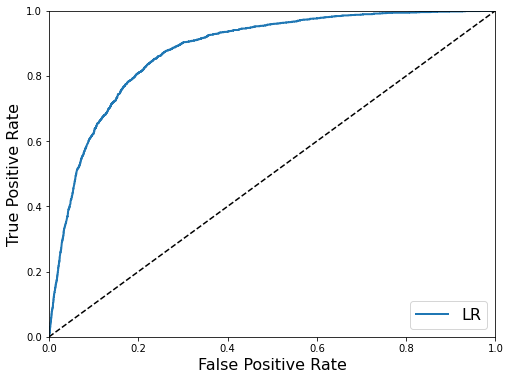

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()